In [2]:
# A lot of code here is simplified and sourced from https://nextjournal.com/gkoehler/digit-recognition-with-keras

In [3]:
%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=8,8

import numpy as np
from keras.utils import np_utils

In [4]:
from keras.datasets import mnist

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

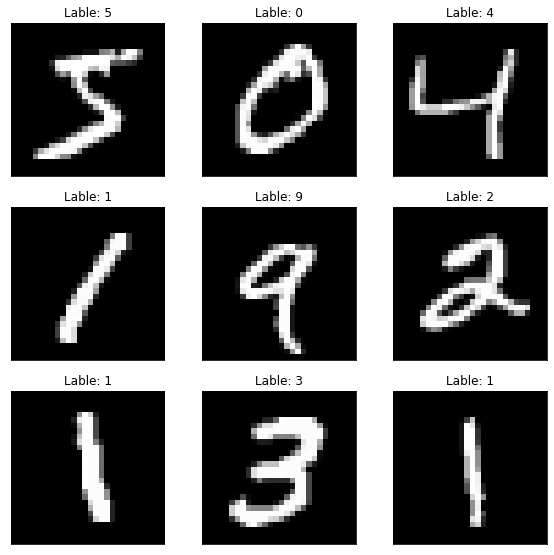

In [6]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Lable: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# Reshape into input vector instead of input matrix

X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
X_train_flat.shape

(60000, 784)

In [10]:
# 255 Channels so a range of 255 for black to white
np.amax(X_train) - np.amin(X_train)

255.0

In [11]:
# We normalise to get x between 0 and 1
X_train_norm = X_train_flat / 255
X_test_norm = X_test_flat / 255
np.amax(X_train_norm) - np.amin(X_train_norm)
transformer = Binarizer(threshold=(255/2)).fit(X_train_flat)
X_train_norm = transformer.transform(X_train_flat)
X_test_norm = transformer.transform(X_test_flat)

Text(0, 0.5, 'Density')

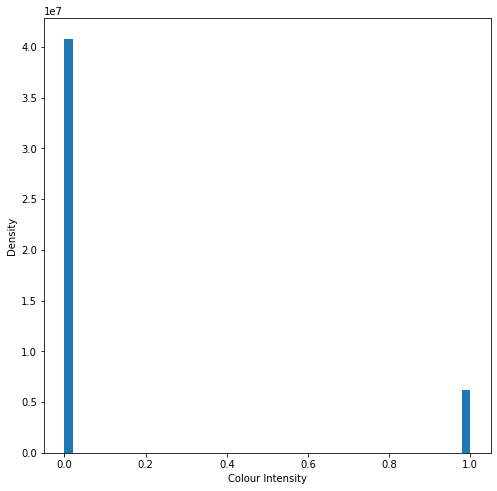

In [12]:
# Distribution of Pixel Values
plt.hist(X_train_norm.flatten(), bins = (50))
plt.xlabel('Colour Intensity')
plt.ylabel('Density')

In [13]:
# Training values into catogories

n_classes = 10
print(y_train[2])
y_train_norm = np_utils.to_categorical(y_train, n_classes)
y_test_norm = np_utils.to_categorical(y_test, n_classes)
print(y_train_norm[2])
print([0,1,2,3,4,5,6,7,8,9])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [14]:
y_train_norm.shape

(60000, 10)

In [15]:
model = LogisticRegression(random_state=0, max_iter=100, multi_class='multinomial', solver='newton-cg').fit(X_train_norm, y_train)



In [16]:
model.score(X_test_flat, y_test)

0.8605

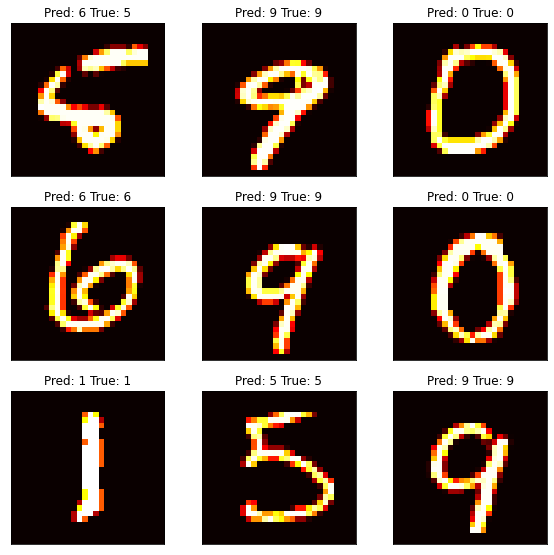

In [17]:
y_pred = model.predict(X_test_norm)


fig = plt.figure()
for i in range(8,17):
  plt.subplot(3,3,i+1 - 8)
  plt.tight_layout()
  plt.imshow(X_test[i], cmap='hot', interpolation='none')
  plt.title("Pred: {} True: {}".format(y_pred[i], y_test[i]))
  plt.xticks([])
  plt.yticks([])

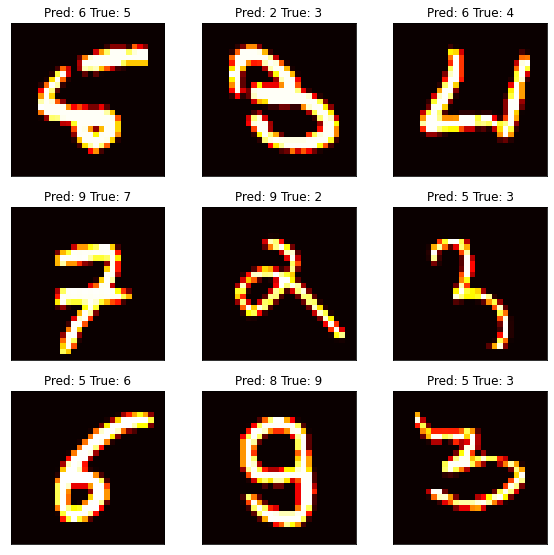

In [18]:
fig = plt.figure()
j = 0
i = 0
while i < 9:
    if y_pred[i + j] != y_test[i + j]:
        plt.subplot(3,3,i+1)
        plt.tight_layout()
        plt.imshow(X_test[i + j], cmap='hot', interpolation='none')
        plt.title("Pred: {} True: {}".format(y_pred[i + j], y_test[i + j]))
        plt.xticks([])
        plt.yticks([])
        i += 1
    else :
        j += 1
            

In [19]:

plt.rcParams["figure.figsize"]=8,8